## Data Dictionary
LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age (year).

PAY_1 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the 
repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005. 

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

In [1]:
# import data set and show the first 5 rows and the shape of the data set
import pandas as pd
defaulted = pd.read_csv('BestCard_data.csv')
defaulted.head(), defaulted.shape

(              ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
 0  798fc410-45c1      20000    2          2         1   24      2      2   
 1  8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
 2  85698822-43f5      90000    2          2         2   34      0      0   
 3  0737c11b-be42      50000    2          2         1   37      0      0   
 4  3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
 
    PAY_3  PAY_4  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
 0     -1     -1  ...         0         0         0   
 1      0      0  ...      1000         0      2000   
 2      0      0  ...      1000      1000      5000   
 3      0      0  ...      1100      1069      1000   
 4     -1      0  ...      9000       689       679   
 
    default payment next month  EDUCATION_CAT  graduate school  high school  \
 0                           1     university                0            0   
 1                           1     university 

In [2]:
# see how many people defaulted (5914 people defaulted)
defaulted['default payment next month'].value_counts()

default payment next month
0    20750
1     5914
Name: count, dtype: int64

In [3]:
# Check class imbalance
defaulted['default payment next month'].value_counts(normalize=True)

default payment next month
0    0.778203
1    0.221797
Name: proportion, dtype: float64

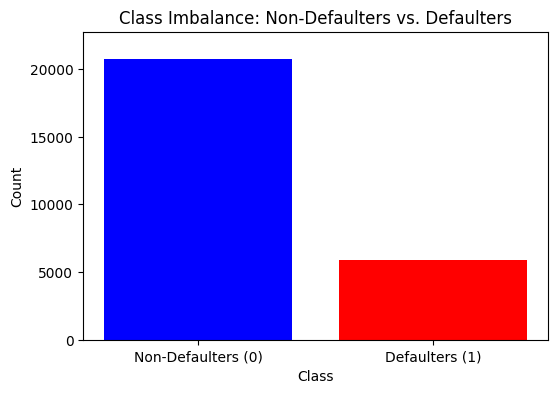

In [4]:
import matplotlib.pyplot as plt

# Define class labels and counts
labels = ['Non-Defaulters (0)', 'Defaulters (1)']
counts = [20750, 5914]

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Imbalance: Non-Defaulters vs. Defaulters")
plt.ylim(0, max(counts) + 2000)

# Display the plot
plt.show()

In [5]:
# Feature Engineering: Debt-to-Limit Ratio
# Higher ratio could mean higher risk of default
#defaulted['debt_ratio'] = (defaulted[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)) / defaulted['LIMIT_BAL']
#defaulted['repayment_ratio'] = (defaulted[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)) / defaulted['LIMIT_BAL']
# Feature Engineering: Late Payments and Credit Utilization
defaulted['late_payments'] = (defaulted[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)
defaulted['credit_utilization'] = defaulted['BILL_AMT1'] / defaulted['LIMIT_BAL']

In [6]:
# Drop unnecessary columns and split into features and target
#x = defaulted.drop(columns=['default payment next month','ID', 'EDUCATION_CAT'])
x = defaulted.drop(columns=['default payment next month','ID', 'EDUCATION_CAT', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'graduate school', 'high school', 'others', 'university', 'none', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
# Setting target variable default payment next month
y = defaulted['default payment next month']

## Scaler and Encoding

In [7]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardizing the predictor variables (X) by transforming them to have a mean of 0 and a standard deviation of 1
# The transformed values are stored in a new DataFrame called 'x_standardized'
x_standarized = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x_standarized.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,PAY_AMT1,late_payments,credit_utilization
0,-1.139267,0.811301,0.211732,-1.066310,-1.246871,1.790797,-0.644999,-0.341581,0.750224,-0.554286
1,-0.369071,0.811301,0.211732,0.851409,-1.030122,-0.871733,-0.661717,-0.341581,0.750224,-0.975559
2,-0.600130,0.811301,0.211732,0.851409,-0.163127,0.015777,-0.301046,-0.250678,-0.536784,-0.240147
3,-0.908208,0.811301,0.211732,-1.066310,0.161997,0.015777,-0.059970,-0.221814,-0.536784,1.254660
4,-0.908208,-1.232588,0.211732,-1.066310,2.329485,-0.871733,-0.581114,-0.221814,-0.536784,-0.610950


In [8]:
# Initialize the LabelEncoder object to encode categorical labels into numeric values
label_encoded = LabelEncoder()

# Fit the label encoder to the 'default' column and transform the categorical values into numeric labels.
y = label_encoded.fit_transform(defaulted['default payment next month'].values)
y

array([1, 1, 0, ..., 1, 1, 1])

## Splitting Data

In [9]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (75-25 split)
# X contains the features (input variables) and y contains the target variable (output labels)
# 75% of the data will be used for training (x_train, y_train), and 25% will be used for testing (x_test, y_test)
# random_state=0 ensures the split is reproducible, meaning the same split is generated each time
x_train, x_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.25, random_state=0)


## Testing Multiple Models
Takes about 1 min to run

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5240
           1       0.38      0.41      0.40      1426

    accuracy                           0.73      6666
   macro avg       0.61      0.62      0.61      6666
weighted avg       0.74      0.73      0.74      6666

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5240
           1       0.47      0.59      0.52      1426

    accuracy                           0.77      6666
   macro avg       0.67      0.70      0.68      6666
weighted avg       0.79      0.77      0.78      6666

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      5240
           1       0.47      0.62      0.54      1426

    accuracy                           0.77      6666
   macro avg       0.68      0.72      0.69      6666
we

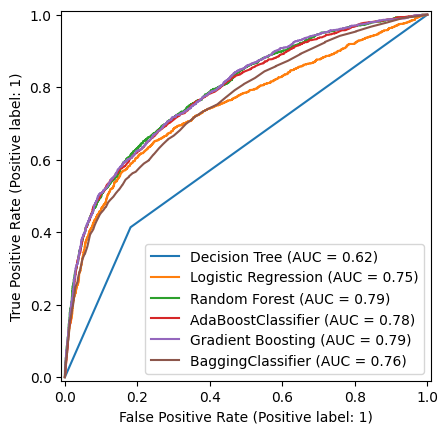

In [10]:
# Import necessary libraries for model training and evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, RocCurveDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Running multiple different models
dtree = DecisionTreeClassifier(random_state = 0)
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, C=10, penalty='l2', solver='liblinear', random_state=0)
randforest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, max_depth=9, min_samples_leaf=4)
boost = AdaBoostClassifier(n_estimators=100, random_state=0)
bagging = BaggingClassifier(n_estimators=100, random_state=0)
gradboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=0)

# Train and evaluate models
models = {'Decision Tree': dtree, 
          'Logistic Regression': log_reg, 
          'Random Forest': randforest, 
          'AdaBoostClassifier': boost,
          'Gradient Boosting': gradboost,
          'BaggingClassifier': bagging
          }

# Plot ROC curve for each model
fig, ax = plt.subplots()

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, name=name)

## Gridsearch
Running against top 2 models - Takes a little over 1 min to complete

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Solver choice for optimization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],  # Number of trees
    'max_depth': [5, 10],  # Depth of trees
    'min_samples_split': [2, 5],  # Minimum samples per split
    'min_samples_leaf': [1, 4],  # Minimum samples in leaf
    'max_features': ['sqrt', 'log2', None],  # Features per split
    'class_weight': ['balanced', 'balanced_subsample']  # Handle class imbalance
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimizing for F1-score
    n_jobs=-1,  # Use all CPU cores for faster computation
    verbose=2  # Shows progress
)

# Fit GridSearchCV on training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [13]:
# Retraining the model with the best hyperparameters
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, C=10, penalty='l2', solver='liblinear', random_state=0)
logmodel = log_reg
logmodel.fit(x_train, y_train)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000, random_state=0,
                   solver='liblinear')

In [14]:
# Retraining the model with the best hyperparameters
randforest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, max_depth=9, min_samples_leaf=4)
forestmodel = randforest
forestmodel.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=4,
                       random_state=0)

In [15]:
# Calculating the feature importance for the random forest model
# forestmodel.feature_importances_ gives the importance score for each feature used in the model
# The higher the score, the more important the feature is in making predictions
# Creating a DataFrame to display the feature importance with feature names (x.columns) as the index

# # Display the feature importance DataFrame
importance_forest = pd.DataFrame(forestmodel.feature_importances_, index=x.columns, columns=["Importance"])
importance_forest.sort_values(by=["Importance"], ascending=False)

,Importance
late_payments,0.293116
PAY_1,0.272743
credit_utilization,0.099014
BILL_AMT1,0.094947
PAY_AMT1,0.085185
LIMIT_BAL,0.080067
AGE,0.043502
EDUCATION,0.014648
SEX,0.008502
MARRIAGE,0.008276


In [16]:
# Extract the coefficients of the logistic regression model
# logreg.coef_ contains the model's coefficients for each feature in the training data
# The first element [0] is selected because it contains the coefficients for the binary classification problem (one class vs. the rest)

# Create a DataFrame to display the coefficients along with the feature names
# x.columns represents the feature names (column names), and 'Coefficients' is the column name for the coefficients
coef = pd.DataFrame(logmodel.coef_[0], index = x.columns,columns=['Coefficients'])

# Display the coefficients DataFrame
coef

,Coefficients
LIMIT_BAL,-0.201822
SEX,-0.054597
EDUCATION,-0.033119
MARRIAGE,-0.075042
AGE,0.063756
PAY_1,0.282056
BILL_AMT1,0.022253
PAY_AMT1,-0.185919
late_payments,0.644041
credit_utilization,-0.069228


In [17]:
# # Importing numpy for mathematical operations, specifically for exponentiating the logistic regression coefficients
import numpy as np

# # Create a DataFrame with the exponentiated coefficients (log odds to odds)
# # np.exp(logreg.coef_) converts the log-odds to odds for each feature's coefficient
# # The first element [0] is selected because it contains the coefficients for binary classification
# # X_train.columns are used to index the features, and 'Odds' is the column name for the transformed values
df = pd.DataFrame(np.exp(logmodel.coef_)[0], index = x_train.columns,columns = ['Odds'])

# Sort the DataFrame by the 'Odds' column in ascending order to view the features in order of their effect on the odds
df.sort_values(by=['Odds'], ascending = True)

,Odds
LIMIT_BAL,0.817240
PAY_AMT1,0.830341
MARRIAGE,0.927704
credit_utilization,0.933114
SEX,0.946866
EDUCATION,0.967424
BILL_AMT1,1.022502
AGE,1.065833
PAY_1,1.325854
late_payments,1.904160


## Deploy Model and Creating the Frontend of the app using Streamlit

In [18]:
# saving the model 
# Import the pickle module to save and load Python objects.
#A pickle file is a file format used in Python to store serialized objects. 
#Pickling refers to the process of converting a Python object (such as a model, list, dictionary, etc.) 
#into a byte stream so that it can be saved to a file or transmitted over a network. 
#The process of converting the byte stream back into the original object is called unpickling.

import pickle 

# Open a file named 'classifier.pkl' in write-binary ('wb') mode to store the trained model.
pickle_out = open("classifier.pkl", mode = "wb") 

# Use pickle to save the trained Logistic Regression model into the 'classifier.pkl' file.
pickle.dump(forestmodel, pickle_out) 

# Close the file after saving the model to ensure the data is written and the file is properly closed.
pickle_out.close()

In [19]:
%%writefile app.py

# Create a new file named 'app.py' to save the code for the Streamlit app. It is important you use this 
# magic function at the begining of the cell. Otherwise you will get error message.

# Import the Streamlit library to create the web app interface.
import pickle
import streamlit as st

# Load the trained model (classifier) from the 'classifier.pkl' file using pickle.
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)


# Define the main function that sets up the layout and functionality of the Streamlit app.
def main():       
    # Streamlit UI
    st.title("📊 Customer Default Prediction App")
    st.write("Predict whether a customer will default on their credit payments.")
    # User input form
    st.sidebar.header("Enter Customer Details")

    # Create input fields where users can enter data for prediction:
    SEX = st.sidebar.selectbox('Gender',("Male","Female"))
    MARRIAGE = st.sidebar.selectbox('Marital Status',("Married", "Single", "Others"))
    EDUCATION = st.sidebar.selectbox('Education Level',("Graduate School", "University", "High School", "Others"))
    LIMIT_BAL = st.sidebar.number_input("Credit Limit", min_value=1000, max_value=1000000, step=1000)
    AGE = st.sidebar.number_input("Age", min_value=18, max_value=100, step=1)
    PAY_1 = st.sidebar.slider("Most Recent Payment Status (-1: Paid in full, 1+: Late)", -2, 8, 0)
    BILL_AMT1 = st.sidebar.number_input("Most Recent Bill Amount", min_value=0, max_value=1000000, step=100)
    PAY_AMT1 = st.sidebar.number_input("Most Recent Payment Amount", min_value=0, max_value=1000000, step=100)
    late_payments = st.sidebar.number_input("Number of Late Payments in last 6 months", min_value=0, max_value=6, step=1)
    credit_utilization = BILL_AMT1/LIMIT_BAL
    result = ""

    # When the 'Predict Default Risk' button is clicked, call the prediction function and display the result.
    if st.button("Predict Default Risk"): 
        result = prediction(LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, BILL_AMT1, PAY_AMT1, late_payments, credit_utilization)


# Define the function to make the prediction based on the input data from the user.
def prediction(LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, BILL_AMT1, PAY_AMT1, late_payments, credit_utilization): 

    # Pre-process the input data to convert categorical values into numerical values:
    if SEX == "Male":
        SEX = 1
    else:
        SEX = 2

    if MARRIAGE == "Married":
        MARRIAGE = 1
    elif MARRIAGE == "Single":
        MARRIAGE = 2
    else:
        MARRIAGE = 0

    if EDUCATION == "Graduate School":
        EDUCATION = 1
    elif EDUCATION == "University":
        EDUCATION = 2
    elif EDUCATION == "High School":
        EDUCATION = 3
    else:
        EDUCATION = 4
    
    # Make the prediction using the trained classifier.
    mypred = classifier.predict( 
        [[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, BILL_AMT1, PAY_AMT1, late_payments, credit_utilization]])
    
    # Convert the prediction result into a human-readable format. 
    if mypred == 1:
        pred = st.error(f"🚨 High Risk: The customer is likely to default!")
    else:
        pred = st.success(f"✅ Low Risk: The customer is unlikely to default.")
    return pred
      
        
# Check if the script is being run directly and call the main function to run the app.
if __name__=='__main__': 
    main()

Overwriting app.py


In [20]:
# Run the Streamlit app using the command below in the terminal:
# streamlit run app.py
!streamlit run app.py

^C
